In [1]:
import numpy as np
import pandas as pd
import random as rnd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.callbacks import CSVLogger
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
fi = open('keptcolumns.txt', 'r')
keptcolumns = fi.read().rstrip('\n').split(', ')
keptcolumns = np.array(keptcolumns)
data = pd.read_csv('epi_r.csv', usecols = keptcolumns)
data = data[pd.notnull(data['calories'])]
data = data[pd.notnull(data['protein'])]
data = data[pd.notnull(data['fat'])]
data = data[data['calories'] != 0]
data = data[data['protein'] != 0]
data = data[data['fat'] != 0]
data = data.values
h_val = data[:, 0:6]
ingred = data[:, 6:]

In [3]:
def gen_dat(b_vec):
    one_cnt = np.sum(b_vec == 1)
    one_idx = np.where(b_vec == 1)

    x = np.zeros((one_cnt, b_vec.shape[0]))
    y = np.zeros((one_cnt, b_vec.shape[0]))

    for i in range(one_cnt):
        y_one_idx = one_idx[0][i];
        x_one_idx = np.setdiff1d(one_idx[0], y_one_idx)
        y[i, y_one_idx] = 1
        x[i, x_one_idx] = 1

    return x, y

In [4]:
x_aug = np.empty((0, ingred.shape[1]))
y_aug = np.empty((0, ingred.shape[1]))
for i in range(ingred.shape[0]):
    x, y = gen_dat(ingred[i])
    x_aug = np.append(x_aug, x, axis = 0)
    y_aug = np.append(y_aug, y, axis = 0)
print(x_aug.shape)
print(y_aug.shape)

(58058, 308)
(58058, 308)


In [11]:
model1 = Sequential([Dense(200, input_shape=(308,)),
                                    LeakyReLU(),
                                    
                                    Dense(300),
                                    LeakyReLU(),
                                    
                                    Dense(300),
                                    LeakyReLU(),
                                                                                                            
                                    Dense(300),
                                    LeakyReLU(),
                                    
                                    Dense(300),
                                    LeakyReLU(),
                                    
                                    Dense(308, activation='sigmoid')
                                   ])
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               61800     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 300)               60300     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 300)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               90300     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 300)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 300)              

In [12]:
csv_logger = CSVLogger('training1.log')
model1.fit(x_aug, y_aug, epochs=18, batch_size=128, callbacks=[csv_logger])

Epoch 1/18
58058/58058 [==============================] - 5s 91us/step - loss: 4.7337 - categorical_accuracy: 0.0373
Epoch 2/18
58058/58058 [==============================] - 5s 89us/step - loss: 4.2887 - categorical_accuracy: 0.0601
Epoch 3/18
58058/58058 [==============================] - 5s 91us/step - loss: 4.0879 - categorical_accuracy: 0.0949
Epoch 4/18
58058/58058 [==============================] - 5s 92us/step - loss: 3.9128 - categorical_accuracy: 0.1338
Epoch 5/18
58058/58058 [==============================] - 6s 107us/step - loss: 3.7473 - categorical_accuracy: 0.1592
Epoch 6/18
58058/58058 [==============================] - 5s 94us/step - loss: 3.5989 - categorical_accuracy: 0.1786
Epoch 7/18
58058/58058 [==============================] - 6s 96us/step - loss: 3.4623 - categorical_accuracy: 0.1958
Epoch 8/18
58058/58058 [==============================] - 6s 112us/step - loss: 3.3265 - categorical_accuracy: 0.2148
Epoch 9/18
58058/58058 [==============================] - 6s 1

In [13]:
x = ingred
calories = h_val[:, 2]
protein = h_val[:, 3]
fat = h_val[:, 4]
y = protein / (calories * fat)
print(np.where(y == 0))
idx = np.argsort(y)
idx = idx[:-250]
np.random.shuffle(idx)
x = x[idx]
y = y[idx]
maxi = np.max(y)
y = y / maxi

(array([], dtype=int64),)


In [14]:
model2 = Sequential([Dense(200, input_shape=(308,)),
                                    LeakyReLU(),
                                    
                                    Dense(500),
                                    LeakyReLU(),
                                    
                                    Dense(500),
                                    LeakyReLU(),
                    
                                    Dense(500),
                                    LeakyReLU(),
                    
                                    Dense(500),
                                    LeakyReLU(),
                    
                                    Dense(500),
                                    LeakyReLU(),
                                                        
                                    Dense(1)
                                   ])
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 200)               61800     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 200)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 500)               100500    
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 500)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 500)               250500    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 500)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 500)              

In [15]:
csv_logger = CSVLogger('training2.log')
model2.fit(x, y, epochs = 100, batch_size=1024, callbacks=[csv_logger])

Epoch 1/100
14123/14123 [==============================] - 2s 135us/step - loss: 0.0230
Epoch 2/100
14123/14123 [==============================] - 2s 116us/step - loss: 0.0168
Epoch 3/100
14123/14123 [==============================] - 2s 117us/step - loss: 0.0151
Epoch 4/100
14123/14123 [==============================] - 2s 117us/step - loss: 0.0140
Epoch 5/100
14123/14123 [==============================] - 2s 117us/step - loss: 0.0129
Epoch 6/100
14123/14123 [==============================] - 2s 118us/step - loss: 0.0119
Epoch 7/100
14123/14123 [==============================] - 2s 119us/step - loss: 0.0101
Epoch 8/100
14123/14123 [==============================] - 2s 118us/step - loss: 0.0092
Epoch 9/100
14123/14123 [==============================] - 2s 120us/step - loss: 0.0082
Epoch 10/100
14123/14123 [==============================] - 2s 119us/step - loss: 0.0086
Epoch 11/100
14123/14123 [==============================] - 2s 120us/step - loss: 0.0071
Epoch 12/100
14123/14123 [====

14123/14123 [==============================] - 2s 122us/step - loss: 0.0030
Epoch 94/100
14123/14123 [==============================] - 2s 124us/step - loss: 0.0030
Epoch 95/100
14123/14123 [==============================] - 2s 123us/step - loss: 0.0030
Epoch 96/100
14123/14123 [==============================] - 2s 127us/step - loss: 0.0030
Epoch 97/100
14123/14123 [==============================] - 2s 126us/step - loss: 0.0030
Epoch 98/100
14123/14123 [==============================] - 3s 206us/step - loss: 0.0030
Epoch 99/100
14123/14123 [==============================] - 2s 125us/step - loss: 0.0029
Epoch 100/100
14123/14123 [==============================] - 2s 125us/step - loss: 0.0030


In [16]:
def test_model(test_ingred):
    one_cnt = np.sum(test_ingred == 1)
    one_idx = np.where(test_ingred == 1)

    for i in range(one_cnt):
        x = np.zeros((1, test_ingred.shape[0]))
        x_one_idx = np.setdiff1d(one_idx[0], one_idx[0][i])
        x[0, x_one_idx] = 1
        
        print("Taken:", end =" ")
        print(keptcolumns[x_one_idx + 6], end =" | ")
        print("Omitted:", end =" ")
        print(keptcolumns[one_idx[0][i] + 6])
        
        y = model.predict(x, batch_size=128)
        y_one_idx = np.argsort(y[0])
        y_one_idx = y_one_idx[-10:]

        print("Suggestions:", end =" ")
        print(keptcolumns[y_one_idx + 6])

In [17]:
cnt1 = 0
cnt2 = 0
for i in range(ingred.shape[0]):
    one_cnt = np.sum(ingred[i] == 1)
    one_idx = np.where(ingred[i] == 1)
    for j in range(one_cnt):
        x = np.zeros((1, ingred[i].shape[0]))
        x_one_idx = np.setdiff1d(one_idx[0], one_idx[0][j])
        x[0, x_one_idx] = 1
        y = model1.predict(x, batch_size = 128)
        y_one_idx = np.argsort(y[0])
        y_one_idx = y_one_idx[-5:]
        if one_idx[0][j] in y_one_idx:
            cnt1 += 1
        cnt2 += 1
print(cnt1 / cnt2)

0.786472148541114


In [18]:
def test_model(x_one_idx):
    x = np.zeros((1, 308))
    x[0, x_one_idx] = 1

    y = model1.predict(x, batch_size = 128)
    y_one_idx = np.argsort(y[0])
    y_one_idx = y_one_idx[-5:]

    print(keptcolumns[y_one_idx + 6])
    print(y[0][y_one_idx])
    
    h = np.zeros(5)
    for i in range(5):
        new_x = np.append(x_one_idx, y_one_idx[i])
        x = np.zeros((1, 308))
        x[0, new_x] = 1        
        new_y = model2.predict(x, batch_size = 128)
        h[i] = new_y
    
    print(h)

In [20]:
row = 12
print(h_val[row][0])
ijk = np.array(np.where(ingred[row] == 1))
print(ijk)
print(keptcolumns[ijk + 6])
print('Suggestions:')
test_model(np.array([30, 127, 136]));

Sweet Buttermilk Spoon Breads 
[[ 30 127 136 167]]
[['bread' 'honey' 'jam or jelly' 'milk/cream']]
Suggestions:
['red wine' 'cornmeal' 'oat' 'egg' 'milk/cream']
[0.03332213 0.04363778 0.0622538  0.25712508 0.4119308 ]
[0.05752414 0.13749087 0.28989393 0.05849975 0.12579966]


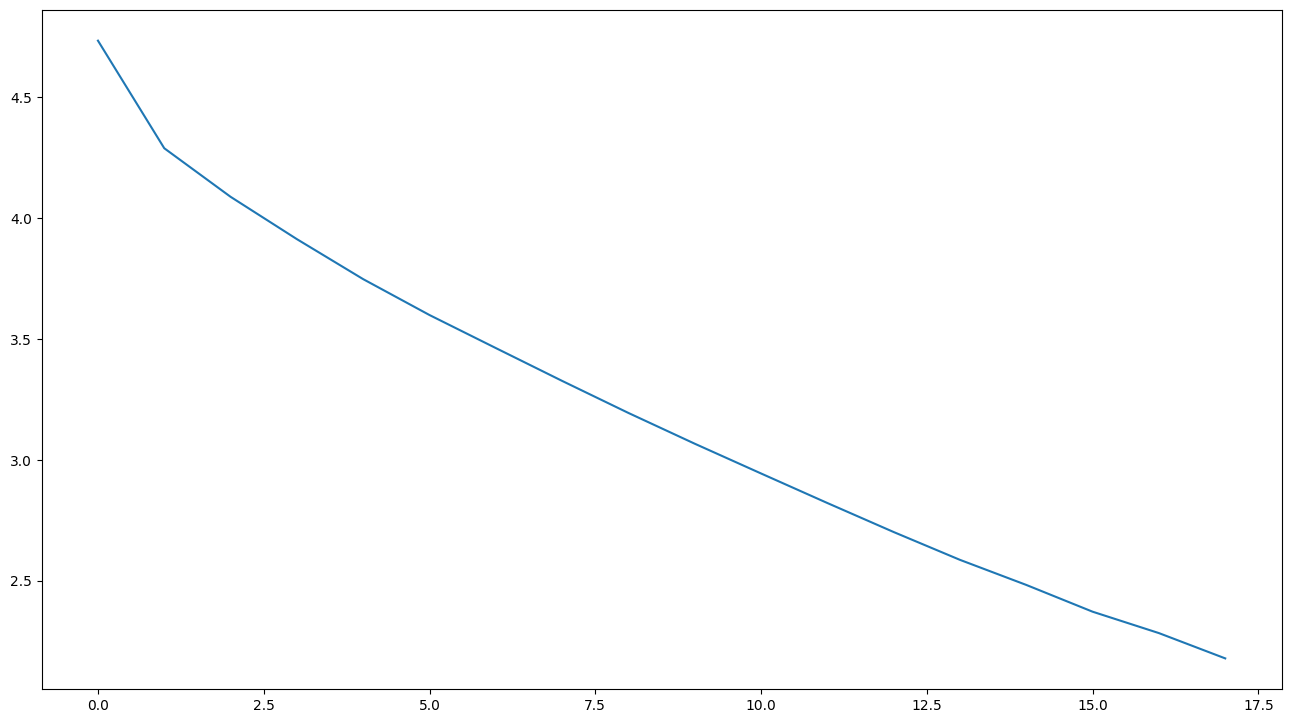

In [37]:
x = np.arange(0, 18)
y = np.array([4.7337, 4.2887, 4.0879, 3.9128, 3.7473, 3.5989, 3.4623, 3.3265, 3.1939, 3.0667, 2.9436, 2.8214, 2.7014, 2.5863, 2.4826, 2.3719, 2.2834, 2.1788])
plt.figure(figsize=(16, 9), dpi=100)
plt.plot(x, y)
plt.savefig('fig.png', dpi = 100)